In [1]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Test 1

In [2]:
df_test1 = pd.read_excel("../data/results/sett/test_1/consolited_resulst-test_input_128.xlsx")
df_test1['qps_observed'] = df_test1['num_completed_requests_per_min']/60

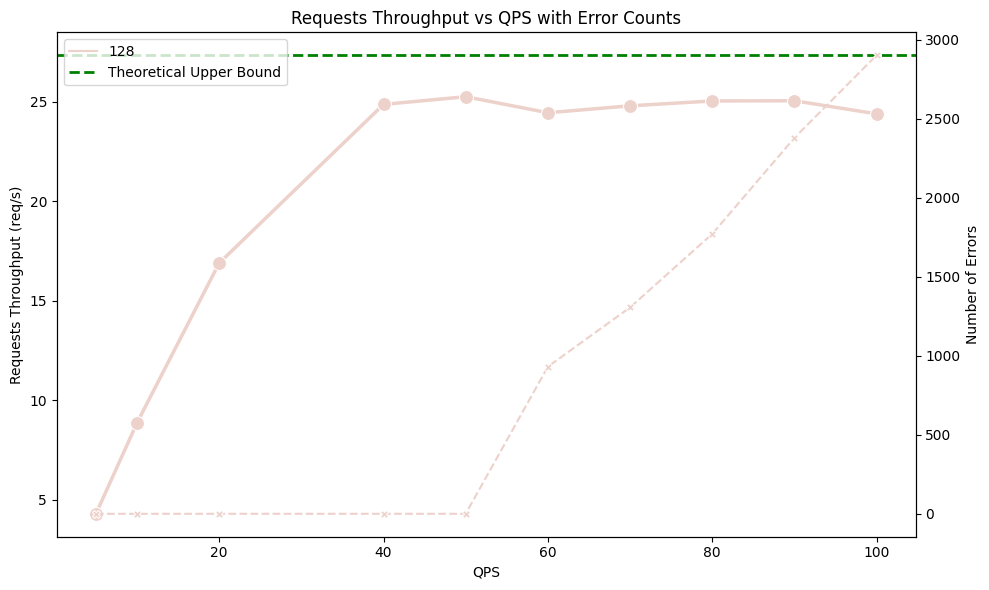

In [3]:
# Plot observed QPS vs input QPS with number_errors overlaid

fig, ax1 = plt.subplots(figsize=(10, 6))


# Lineplot: Observed QPS vs QPS
sns.lineplot(
    data=df_test1,
    x='qps',
    y='qps_observed',
    hue='num_input_tokens',
    marker='o',
    markersize=10,
    linewidth=2.5,
    ax=ax1
)

# Compute theoretical upper bound (requests per second)
nnodes = 4
maxbatch = 32
upper_bound_rps = nnodes*maxbatch / (
    df_test1['server_ttft_s_p50'].max() +
    df_test1['server_number_output_tokens_p50'].max() / df_test1['server_output_token_per_s_p50'].min()
)

# Theoretical upper bound line
ax1.axhline(y=upper_bound_rps, color='green', linestyle='--', linewidth=2, label='Theoretical Upper Bound')

# Axis 1 labels
ax1.set_xlabel('QPS')
ax1.set_ylabel('Requests Throughput (req/s)')
ax1.set_title('Requests Throughput vs QPS with Error Counts')
ax1.legend(loc='upper left')

# Twin axis for number_errors
ax2 = ax1.twinx()
sns.lineplot(
    data=df_test1,
    x='qps',
    y='number_errors',
    hue='num_input_tokens',
    marker='X',
    linestyle='--',
    legend=False,
    color='red',
    ax=ax2
)
ax2.set_ylabel('Number of Errors')

plt.tight_layout()
plt.show()


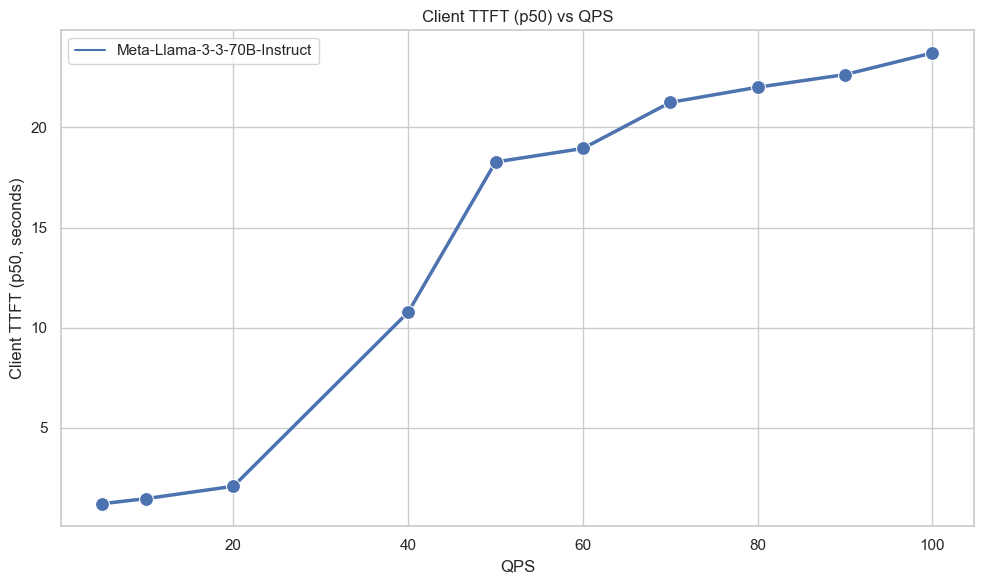

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', context='notebook')

# Compute observed QPS
df_test1['qps_observed'] = df_test1['num_completed_requests_per_min'] / 60

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_test1,
    x='qps',
    y='client_ttft_s_p50',
    hue='model',
    marker='o',
    markersize=10,
    linewidth=2.5
)

# Add upper bound line — if applicable to latency, adjust variable name
# (otherwise remove it — upper_bound_rps doesn't make sense for latency plot)
# plt.axhline(...) ← likely not appropriate here unless you're plotting a latency threshold

# Labels and title
plt.xlabel('QPS')
plt.ylabel('Client TTFT (p50, seconds)')
plt.title('Client TTFT (p50) vs QPS')
plt.legend()
plt.tight_layout()
plt.show()


## Test 2

In [6]:
df_test2 = pd.read_excel("../data/results/sett/test_2/consolited_resulst-test_2.xlsx")

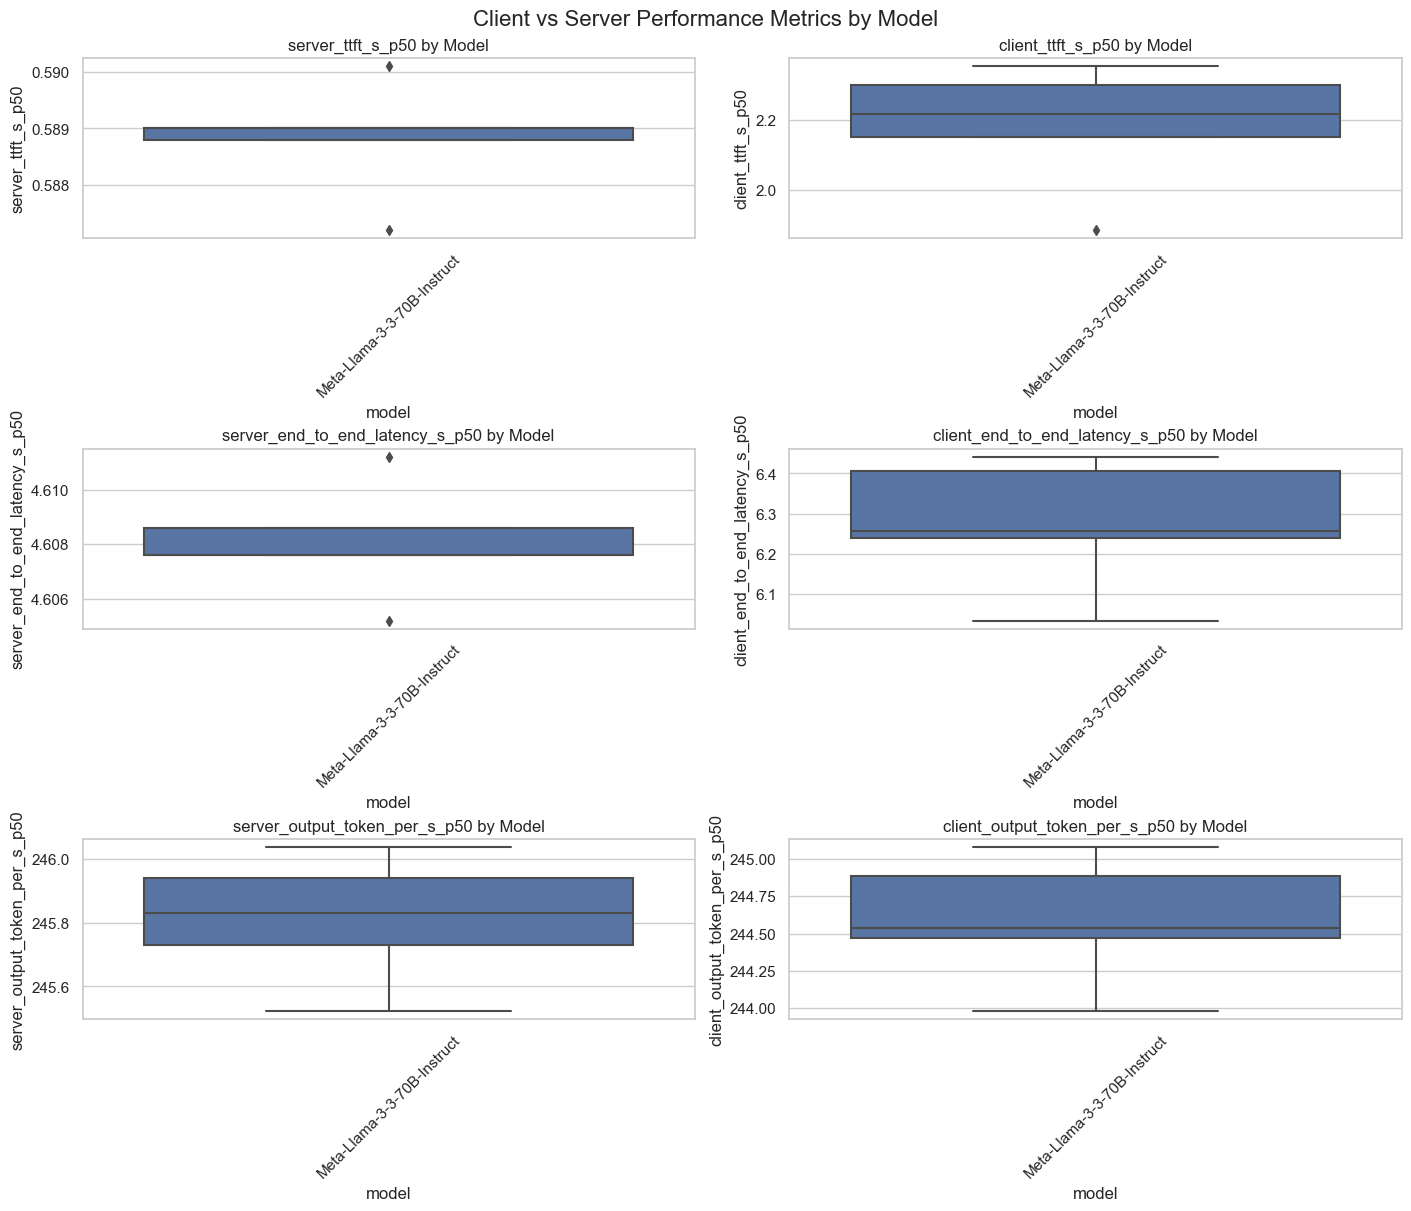

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid", context="notebook")

# Client and server metrics (p50 only, relevant for performance comparison)
server_metrics = [
    'server_ttft_s_p50',
    'server_end_to_end_latency_s_p50',
    'server_output_token_per_s_p50'
]

client_metrics = [
    'client_ttft_s_p50',
    'client_end_to_end_latency_s_p50',
    'client_output_token_per_s_p50'
]

# Shared plot size
fig, axes = plt.subplots(
    nrows=len(server_metrics),
    ncols=2,
    figsize=(14, 4 * len(server_metrics)),
    constrained_layout=True
)

# Loop and plot
for i in range(len(server_metrics)):
    # Server
    sns.boxplot(data=df_test2, x='model', y=server_metrics[i], ax=axes[i, 0])
    axes[i, 0].set_title(f'{server_metrics[i]} by Model')
    axes[i, 0].tick_params(axis='x', rotation=45)

    # Client

    sns.boxplot(data=df_test2, x='model', y=client_metrics[i], ax=axes[i, 1])
    axes[i, 1].set_title(f'{client_metrics[i]} by Model')
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Client vs Server Performance Metrics by Model', fontsize=16)
plt.show()
